# July 2023 Cu-F and Cu-K update from summer 2024


In [1]:
import sys
import os
import json
sys.path.append(os.path.expanduser('~/git/TrON'))
sys.path.append(os.path.expanduser('~/git/nh3-analysis'))

import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

from matplotlib.path import Path
from matplotlib.patches import PathPatch

%matplotlib ipympl

import warnings
warnings.filterwarnings('ignore', module='numpy')
warnings.filterwarnings('ignore')

import importlib
try:
    import bumps
    from bumps import dream
    HAS_BUMPS  = True
except:
    print("No bumps")
    HAS_BUMPS = False

if HAS_BUMPS:
    from tron.bayesian_analysis import fit_uncertainties
    importlib.reload(fit_uncertainties)

from tron.bayesian_analysis import summary_plots

# Cu-F

In [54]:
project_dir = os.path.expanduser('~/git/nh3-analysis/july2023/')

# Auto-reduction directory
ar_dir = '/SNS/REF_L/IPTS-30384/shared/autoreduce/'

dynamic_run = 207168 # Cycle 1

dyn_data_dir = '/SNS/REF_L/IPTS-30384/shared/dynamic/Cu-F/30s'

dyn_model_dir = os.path.expanduser(os.path.join(project_dir, 'data', 'results', 'refl1d_output'))

dyn_fit_dir = os.path.join(dyn_model_dir, '%s-dyn/results-30s-bck' % dynamic_run)



23


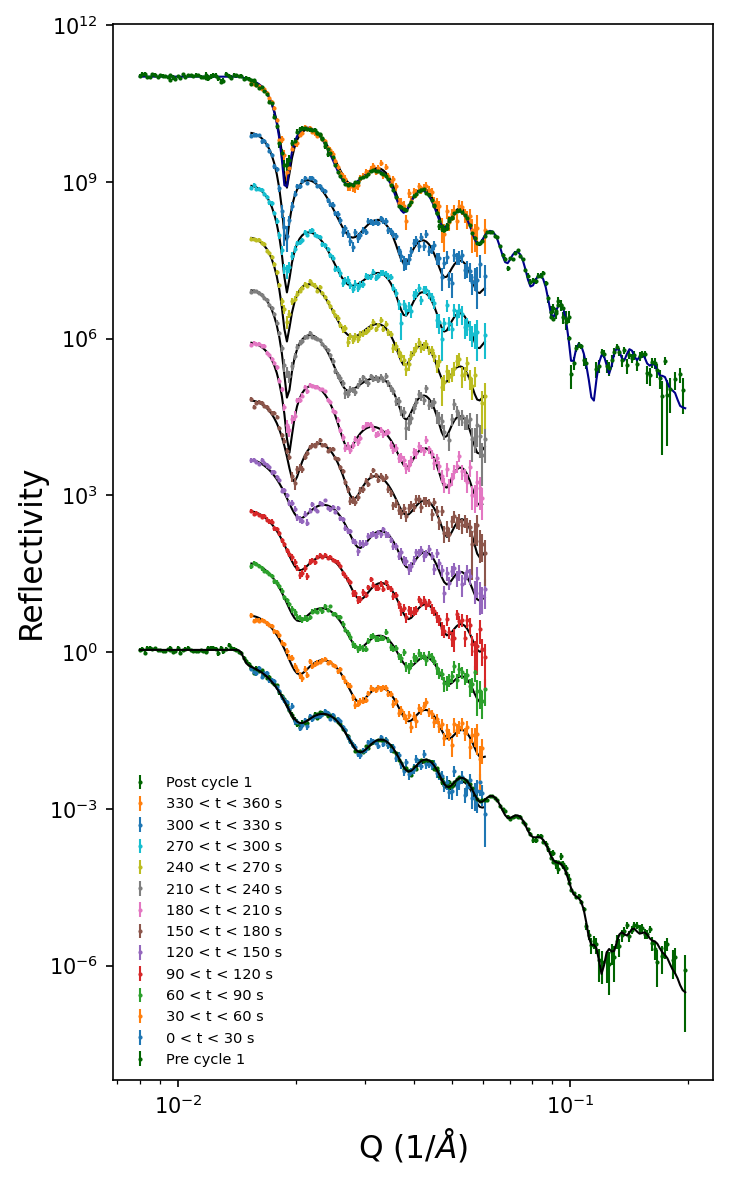

In [55]:
importlib.reload(summary_plots)

last_time = 12

refl_init = os.path.join(project_dir, 'data', 'results', 'refl1d_output', "REFL_207161-refl.dat")
refl_final = os.path.join(project_dir, 'data', 'results', 'refl1d_output', "REFL_207169-refl.dat")

file_list = summary_plots.plot_dyn_data(dynamic_run, refl_init, refl_final, first_index=0, last_index=12, model_name='model-loop-207168',
                                        dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir)

plt.savefig('Cu-F-dyn-Rq.png')


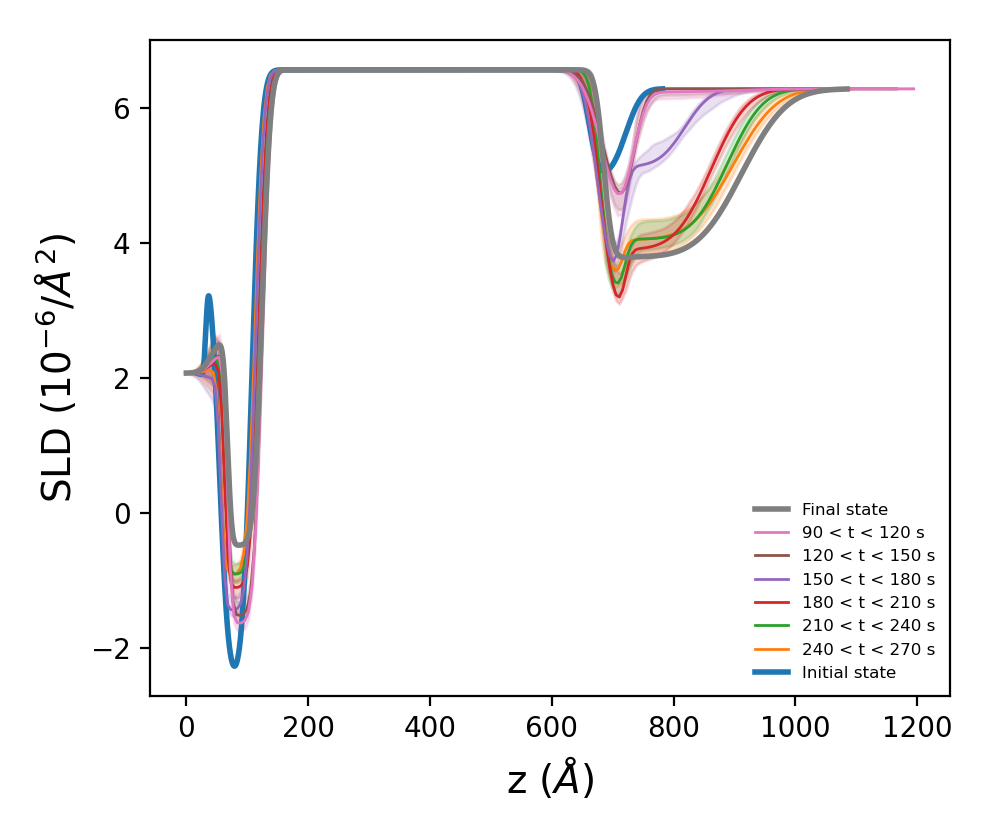

In [56]:
# Plot manual fits
importlib.reload(summary_plots)

# List of time-resolved data to plot
_file_list = [file_list[i] for i in [3,4,5,6,7,8]]

sld_init = os.path.join(project_dir, 'data', 'results', 'refl1d_output', "REFL_207161-profile.dat")
sld_final = os.path.join(project_dir, 'data', 'results', 'refl1d_output', "REFL_207169-profile.dat")

summary_plots.plot_dyn_sld(_file_list, sld_init, sld_final, 
                           dyn_fit_dir=dyn_fit_dir, 
                           show_cl=True, model_name='model-loop-207168')
plt.savefig('Cu-F.svg')
plt.savefig('Cu-F.png')


Output saved to /SNS/users/m2d/git/nh3-analysis/july2023/data/results/refl1d_output/207168-dyn/results-30s-bck/trend-model-loop-207168.json


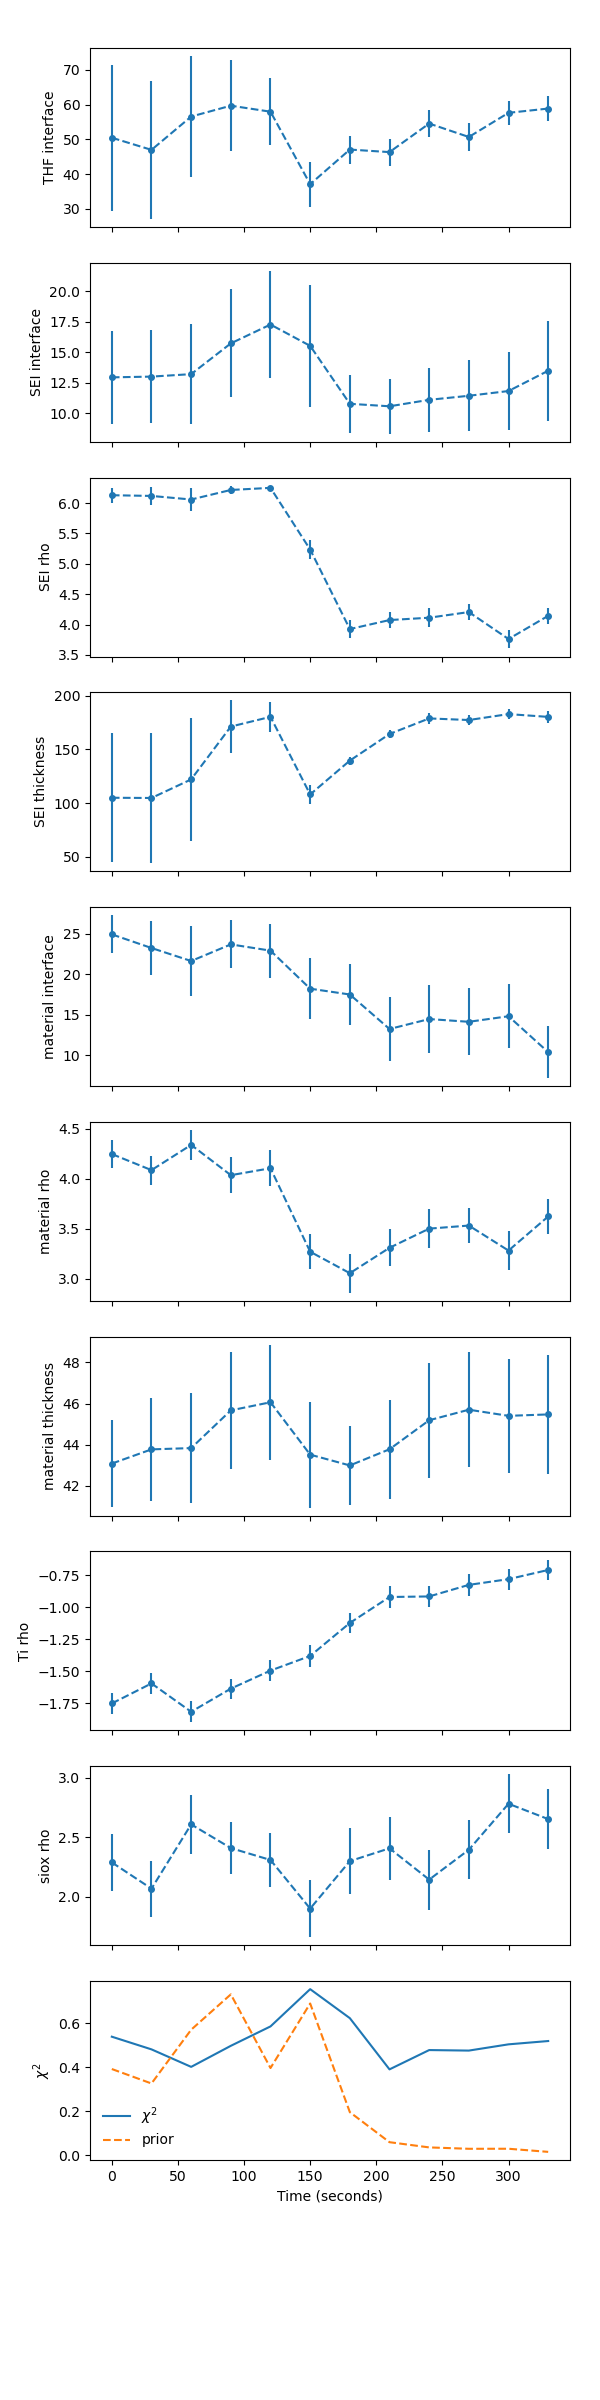

In [57]:
importlib.reload(summary_plots)

initial_state = 207161
trend_data, trend_err = summary_plots.trend_data(file_list, initial_state, 207169, 
                                                   fit_dir=dyn_model_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir, 
                                                   model_name='model-loop-207168', model_file=None, add_plot=0)

trend_file = os.path.join(dyn_fit_dir, 'trend-model-loop-207168.json')
summary_plots.write_md_table(trend_file)

# Cu-K

In [38]:
dynamic_run = 207275 # Cycle 1

dyn_data_dir = '/SNS/REF_L/IPTS-30384/shared/dynamic/Cu-K/30s'

dyn_model_dir = os.path.expanduser(os.path.join(project_dir, 'data', 'results', 'refl1d_output'))

dyn_fit_dir = os.path.join(dyn_model_dir, '%s-dyn/results-30s-bck' % dynamic_run)

print(dyn_fit_dir)

/SNS/users/m2d/git/nh3-analysis/july2023/data/results/refl1d_output/207275-dyn/results-30s-bck


23


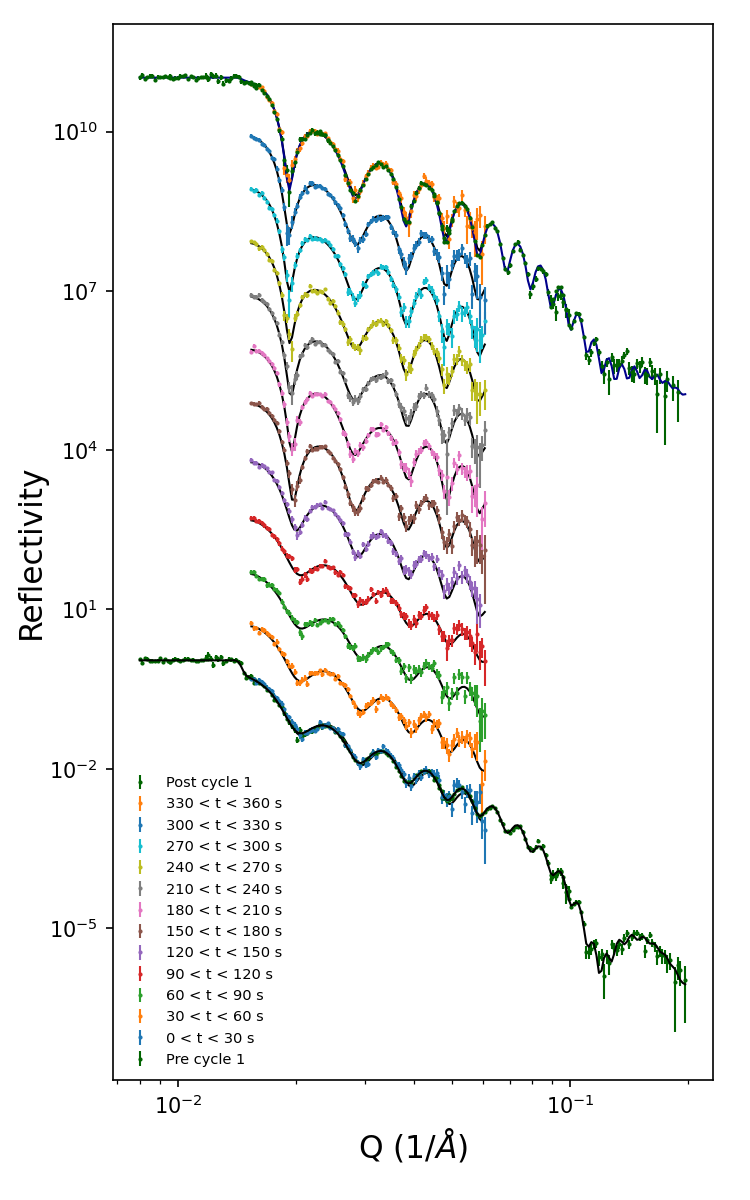

In [39]:
importlib.reload(summary_plots)

last_time = 12

refl_init = os.path.join(project_dir, 'data', 'results', 'refl1d_output', "REFL_207268-refl.dat")
refl_final = os.path.join(project_dir, 'data', 'results', 'refl1d_output', "REFL_207282-refl.dat")

file_list = summary_plots.plot_dyn_data(dynamic_run, refl_init, refl_final, first_index=0, last_index=12, model_name='model-loop-207275',
                                        dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir)

plt.savefig('Cu-K-dyn-Rq.png')

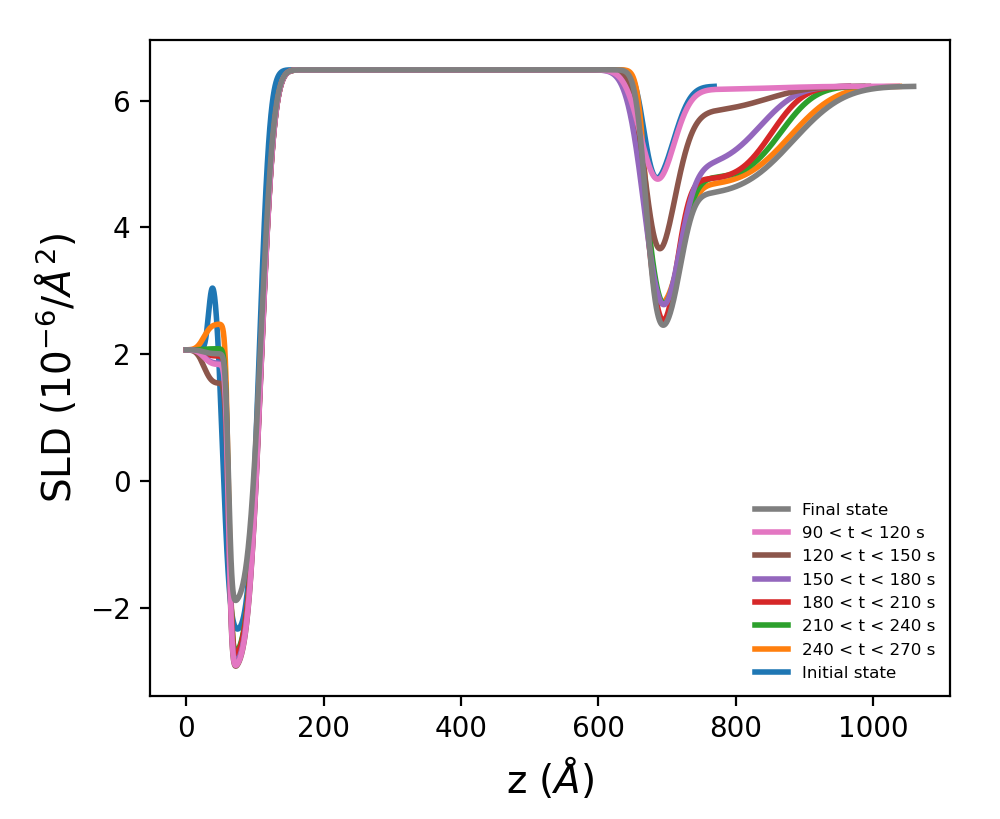

In [43]:
importlib.reload(summary_plots)
# List of time-resolved data to plot
_file_list = [file_list[i] for i in [3,4,5,6,7,8]]

sld_init = os.path.join(project_dir, 'data', 'results', 'refl1d_output', "REFL_207268-profile.dat")
sld_final = os.path.join(project_dir, 'data', 'results', 'refl1d_output', "REFL_207282-profile.dat")

summary_plots.plot_dyn_sld(_file_list, sld_init, sld_final, 
                           dyn_fit_dir=dyn_fit_dir, 
                           show_cl=False, model_name='model-loop-207275')
plt.savefig('Cu-K.svg')
plt.savefig('Cu-K.png')

Output saved to /SNS/users/m2d/git/nh3-analysis/july2023/data/results/refl1d_output/207275-dyn/results-30s-bck/trend-model-loop-207275.json


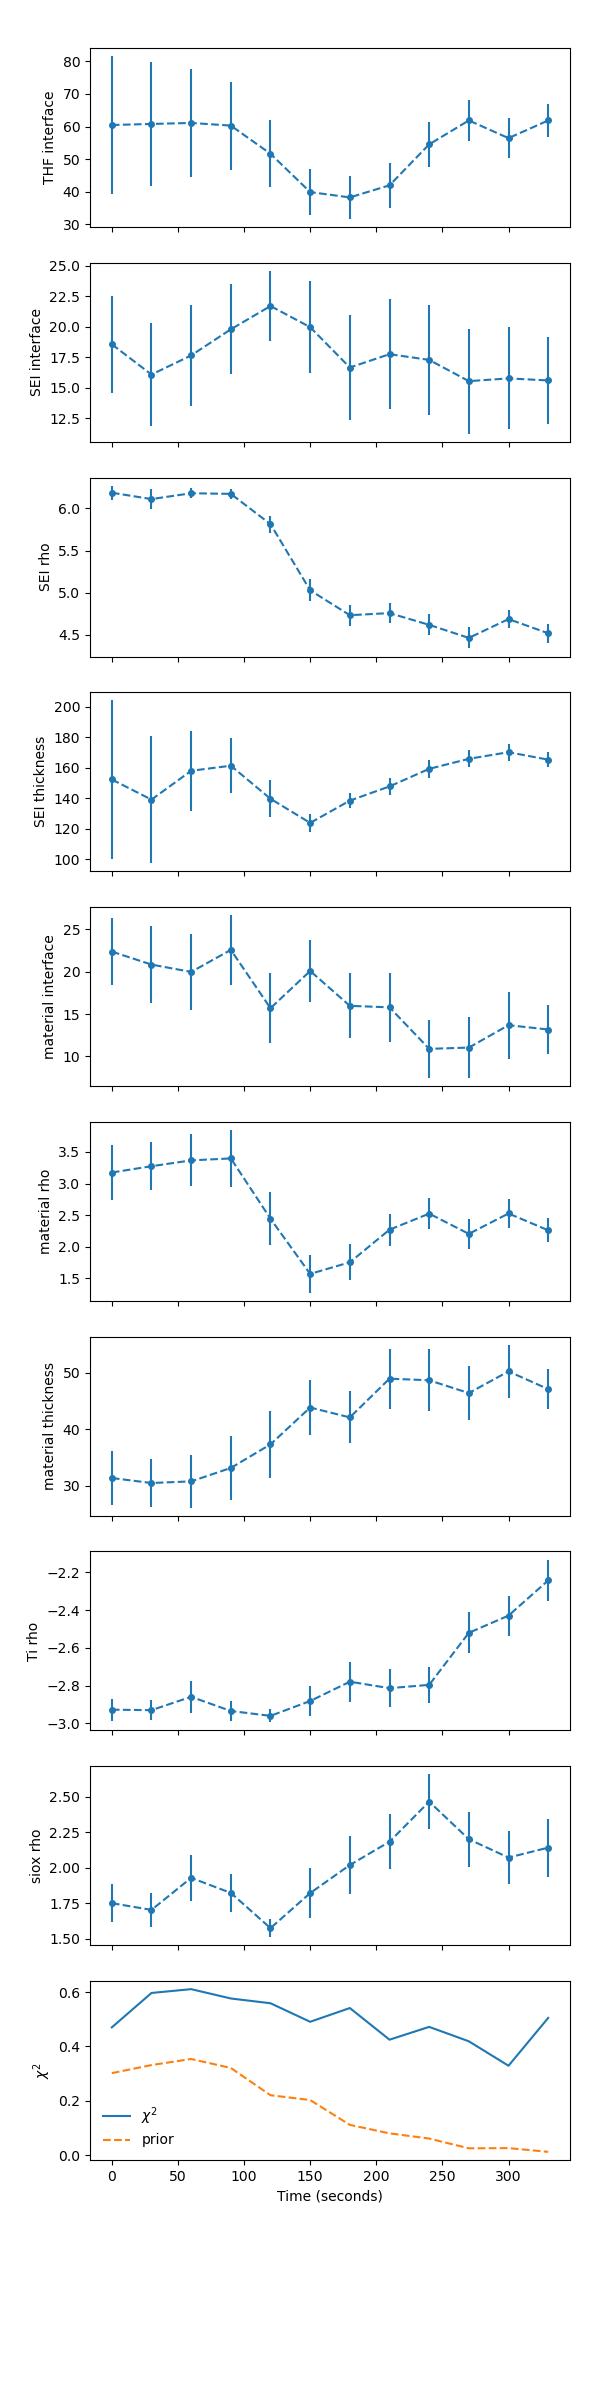

In [44]:
trend_data, trend_err = summary_plots.trend_data(file_list, 207268, 207282, 
                                                   fit_dir=dyn_model_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir, 
                                                   model_name='model-loop-207275', model_file=None, add_plot=0)

trend_file = os.path.join(dyn_fit_dir, 'trend-model-loop-207275.json')
summary_plots.write_md_table(trend_file)

dict_keys(['THF interface', 'SEI interface', 'SEI rho', 'SEI thickness', 'material interface', 'material rho', 'material thickness', 'Ti rho', 'siox rho'])
[152.39290716557832, 139.18809648812254, 158.11683558673352, 161.41577034678934, 139.74719059893354, 123.91740597280396, 138.53669524444808, 147.84644360650736, 159.36558215585583, 165.94216989648118, 170.3007514332675, 165.39967311515977]


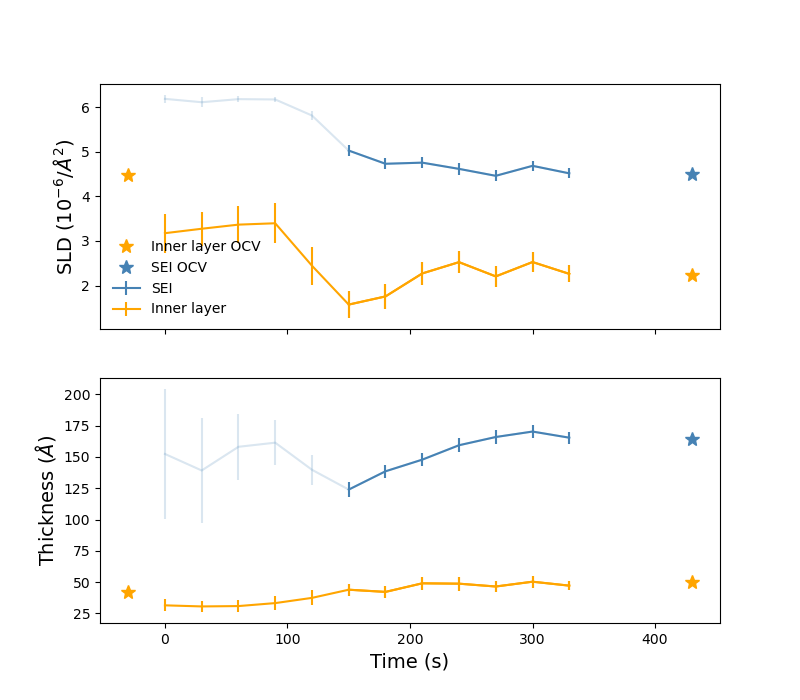

In [53]:
trend_data_file = os.path.join(dyn_fit_dir, 'trend-model-loop-207275.json')
with open(trend_data_file) as fd:
    data = json.load(fd)

timestamps = data[0]

print(trend_data.keys())
print(trend_data['SEI thickness'])

material_rho = [4.47, 2.24]
material_thickness = [42.2, 50]
sei_rho = [4.51]
sei_thickness = [164.3]


i_start = 5

fig, axs = plt.subplots(2, 1, dpi=100, figsize=(8,7), sharex=True)
plt.subplot(2, 1, 1)
plt.errorbar(timestamps, trend_data['SEI rho'], yerr=trend_err['SEI rho'], alpha=0.2, color='steelblue')
plt.errorbar(timestamps, trend_data['material rho'], yerr=trend_err['material rho'], alpha=1, color='orange')

plt.errorbar(timestamps[i_start:], trend_data['SEI rho'][i_start:], yerr=trend_err['SEI rho'][i_start:], label='SEI', color='steelblue')
plt.errorbar(timestamps[i_start:], trend_data['material rho'][i_start:], yerr=trend_err['material rho'][i_start:], label='Inner layer', color='orange')

plt.plot([timestamps[0]-30, timestamps[-1]+100], material_rho, linestyle='', marker='*', color='orange', markersize=10, label='Inner layer OCV')
plt.plot([timestamps[-1]+100], sei_rho, linestyle='', marker='*', color='steelblue', markersize=10, label='SEI OCV')

#plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('SLD ($10^{-6}/\AA^2$)', fontsize=14)
plt.legend(frameon=False)



plt.subplot(2, 1, 2)
plt.errorbar(timestamps, trend_data['SEI thickness'], yerr=trend_err['SEI thickness'], alpha=0.2, color='steelblue')
plt.errorbar(timestamps, trend_data['material thickness'], yerr=trend_err['material thickness'], alpha=1, color='orange')
plt.errorbar(timestamps[i_start:], trend_data['SEI thickness'][i_start:], yerr=trend_err['SEI thickness'][i_start:], color='steelblue')
plt.errorbar(timestamps[i_start:], trend_data['material thickness'][i_start:], yerr=trend_err['material thickness'][i_start:], color='orange')
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Thickness ($\AA$)', fontsize=14)

plt.plot([timestamps[0]-30, timestamps[-1]+100], material_thickness, linestyle='', marker='*', color='orange', markersize=10, label='Inner layer OCV')
plt.plot([timestamps[-1]+100], sei_thickness, linestyle='', marker='*', color='steelblue', markersize=10, label='SEI OCV')

plt.savefig('Cu-K-trend.png')